# Linear Regression

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.
In the figure above, X (input) is the work experience and Y (output) is the salary of a person. The regression line is the best fit line for our model.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
dataset=pd.read_csv('weather.csv')
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [3]:
x=dataset.iloc[:,:]
X=x.drop(x.columns[4],axis=1)
type(X)

pandas.core.frame.DataFrame

In [4]:
#Output Class(Apparent Temprature)
Y=dataset.iloc[:,4]
Y.head()
Y=pd.DataFrame(Y)
type(Y)
print(Y.shape)

(77285, 1)


# Given data

In [5]:
X.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


# Data Correlation

In [6]:
dataset.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992650,-0.631860,0.006087,0.028669,0.393023,-0.008325
Apparent Temperature (C),0.992650,1.000000,-0.602287,-0.059701,0.027553,0.381814,-0.002696
Humidity,-0.631860,-0.602287,1.000000,-0.222247,0.001742,-0.370555,0.007628
Wind Speed (km/h),0.006087,-0.059701,-0.222247,1.000000,0.104298,0.100110,-0.048356
Wind Bearing (degrees),0.028669,0.027553,0.001742,0.104298,1.000000,0.048980,-0.010738
Visibility (km),0.393023,0.381814,-0.370555,0.100110,0.048980,1.000000,0.058638
Pressure (millibars),-0.008325,-0.002696,0.007628,-0.048356,-0.010738,0.058638,1.000000


# Data after dropping unneccessary coloumns

In [7]:
X1=X.drop(X.columns[[0, 1, 2,6,9]], axis = 1) 
X1.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


In [8]:
type(X1)

pandas.core.frame.DataFrame

In [9]:
weights=[1,0,1,0,1,0]
weights=np.asarray(weights)
weights=weights.reshape(len(weights),1)
weights.shape

(6, 1)

# Data Scaling

In [10]:
scaler=MinMaxScaler()

In [11]:
X1=scaler.fit_transform(X1)
# X1

In [12]:
X1=pd.DataFrame(X1)
type(X1)

pandas.core.frame.DataFrame

In [13]:
X1.head()

,0,1,2,3,4
0,0.506975,0.89,0.221130,0.983,0.970135
1,0.505085,0.86,0.223399,0.983,0.970613
2,0.505445,0.89,0.061523,0.929,0.970909
3,0.487805,0.83,0.220877,0.983,0.971358
4,0.495365,0.83,0.172970,0.983,0.971454


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y, test_size=0.3,random_state=42)

In [16]:
type(X_train)

pandas.core.frame.DataFrame

In [17]:
type(X_test)

pandas.core.frame.DataFrame

In [18]:
type(y_train)

pandas.core.frame.DataFrame

In [19]:
type(y_test)

pandas.core.frame.DataFrame

# Adding of bias 'b0'

In [20]:
Bias_array=[1]*(len(X_train))
X_train.insert(loc=0,column='bias',value=Bias_array)

In [21]:
Bias_array1=[1]*(len(X_test))
X_test.insert(loc=0,column='bias',value=Bias_array1)

In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [23]:
type(X_test)

pandas.core.frame.DataFrame

In [24]:
y_train=y_train.to_numpy()

In [25]:
y_test=y_test.to_numpy()

In [26]:
y_train=y_train.reshape(len(y_train),1)

In [27]:
y_test=y_test.reshape(len(y_test),1)

# Algorithm for continous update

Cost Function (J):
By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum. So, it is very important to update the θ1 and θ2 values, to reach the best value that minimize the error between predicted y value (pred) and true y value (y).

Gradient Descent:
To update θ1 and θ2 values in order to reduce Cost function (minimizing RMSE value) and achieving the best fit line the model uses Gradient Descent. The idea is to start with random θ1 and θ2 values and then iteratively updating the values, reaching minimum cost. 

In [28]:
learning_parameter=0.01
iters=100000
for i in range(0,iters):
    error=X_train.dot(weights)-y_train
    cost_fun=(X_train.T.dot(error))
#     print(cost_fun)
    weights=weights-(learning_parameter*cost_fun)*(1/(len(X_train)))
#     print(weights)
predict=X_test.dot(weights)   


In [34]:
print('The mean absolute error is :')
m=mean_absolute_error(y_test, predict)
print(m)

The mean absolute error is :
0.8508998845783752


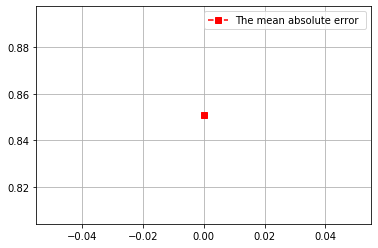

In [35]:
plt.plot(m,'rs--',label='The mean absolute error ')
plt.grid()
plt.legend()
plt.show()

In [31]:
print('The mean squared error is :')
mean_squared_error(y_test,predict)

The mean squared error is :


1.169725198422117

In [36]:
print('Mean absolute percentage error is :')
mask = y_test != 0
print((np.fabs(y_test- predict)/y_test)[mask].mean())

Mean absolute percentage error is :
0    0.002294
dtype: float64


# R2 Score

In [33]:
from sklearn.metrics import r2_score
print("R2 Score = ",r2_score(y_test,predict))

R2 Score =  0.9897971994987085
